# Supprot Vector Machine (SVM)

In [1]:
# SVM :- Basically used for images and videos, Facial recgnition
#Here two classes are separated by decision boundry ie a hyper-plane(Margin). There shouldn't be any point present on plane
# We try on maximize the width of DB (increase margin). width of margin is limited by points present on boundry line.
# These limiting points are indicted by vectors, so the points are called as 'Support Vectors'

In [2]:
# Kernal trick:- In SVM, it converts the given data into 1D higher data by creating a new column (1D to 2D, 2D to 3D.. etc)
# After that it finds a hyper plane to separate the data into 2 parts.

In [3]:
# Polynomial kernal:- The equatiion used to create new col in the form of square. eg x1= sqr(x0) or x2 = sqr(x0) + sqr(x1)
# Radial Basis Func/Guassian Func:- It gives o/p curve in the form of bell shape. x1 = a.e^ (- (x-b)^2/ 2(c)^2)
# Sigmoid Kernal:- Sigmoid function is used to distinguish between two classes

# Implementation of SVM

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Social_Network_Ads.csv')

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=52) 

In [10]:
# Scaling is required as we need to find out plane to separate the 2 classes where GD is used
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit (X_train)  # Used to find out minimum and maximum values of X_train

MinMaxScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC

In [14]:
# Linear kernal
model_linear = SVC(kernel='linear') # We have to specify which kernal is to be used (eg.{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'})
model_linear.fit(X_train_scaled, y_train)  # train the model

SVC(kernel='linear')

In [15]:
model_linear.score(X_train_scaled, y_train), model_linear.score(X_test_scaled, y_test)  # find the score

(0.8366666666666667, 0.79)

In [16]:
# polynomial Kernal
model_poly = SVC(kernel='poly')
model_poly.fit(X_train_scaled, y_train)
model_poly.score(X_train_scaled, y_train), model_poly.score(X_test_scaled, y_test)

(0.9, 0.87)

In [17]:
# rbf Kernal:- Generally useful for complicated data
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_scaled, y_train)
model_rbf.score(X_train_scaled, y_train), model_rbf.score(X_test_scaled, y_test)

(0.91, 0.92)

In [18]:
# sigmoid Kernal
model_sigm = SVC(kernel='sigmoid')
model_sigm.fit(X_train_scaled, y_train)
model_sigm.score(X_train_scaled, y_train), model_sigm.score(X_test_scaled, y_test)

(0.36666666666666664, 0.32)

# Visualise Decision Boundry/ hyper plane

In [19]:
import numpy as np

In [20]:
col = row = np.arange(0,1,0.01)

In [21]:
grid = []
for r in row:
    for c in col:
        grid.append([r,c])

In [22]:
grid = np.array(grid)

In [23]:
grid

array([[0.  , 0.  ],
       [0.  , 0.01],
       [0.  , 0.02],
       ...,
       [0.99, 0.97],
       [0.99, 0.98],
       [0.99, 0.99]])

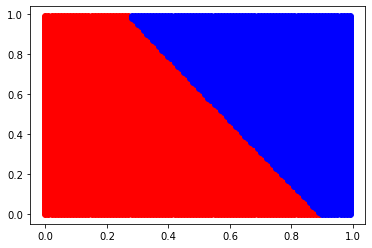

In [24]:
# Plotting decision boundry for linear kernal
y_pred = model_linear.predict(grid)
class_0 = grid[y_pred == 0]
class_1 = grid[y_pred == 1]
plt.scatter(class_0[:,0], class_0[:,1], c ='red' )
plt.scatter(class_1[:,0], class_1[:,1], c ='blue' )

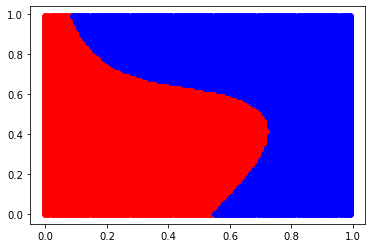

In [25]:
# Plotting decision boundry for polynomial kernal
y_pred = model_poly.predict(grid)
class_0 = grid[y_pred == 0]
class_1 = grid[y_pred == 1]
plt.scatter(class_0[:,0], class_0[:,1], c ='red' )
plt.scatter(class_1[:,0], class_1[:,1], c ='blue' )

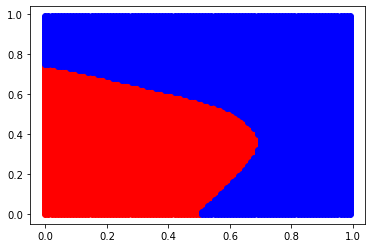

In [26]:
# Plotting decision boundry for rbf kernal
y_pred = model_rbf.predict(grid)
class_0 = grid[y_pred == 0]
class_1 = grid[y_pred == 1]
plt.scatter(class_0[:,0], class_0[:,1], c ='red' )
plt.scatter(class_1[:,0], class_1[:,1], c ='blue' )

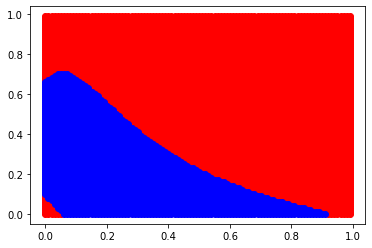

In [27]:
# Plotting decision boundry for sigmoid kernal
y_pred = model_sigm.predict(grid)
class_0 = grid[y_pred == 0]
class_1 = grid[y_pred == 1]
plt.scatter(class_0[:,0], class_0[:,1], c ='red' )
plt.scatter(class_1[:,0], class_1[:,1], c ='blue' )